In [5]:
#Task 1: Load and Explore the Dataset
## A CSV file named iris

import pandas as pd

# Correct URL of the Iris dataset (raw data file)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Column names (since the Iris dataset does not have headers by default)
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset with comma as delimiter and skip bad lines
df = pd.read_csv(url, header=None, names=column_names, sep=',', on_bad_lines='skip')

# Display the first few rows of the dataframe
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
# 1.1. Check the data types of the columns
print("\nData Types of the Columns:")
print(df.dtypes)




Data Types of the Columns:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [7]:
# 1.2. Check for any missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:
# Step 2: Clean the dataset

# 2.1. Fill missing values (if any). In this case, Iris dataset should not have any missing values,
# but in case there are any, we can fill with the median for numerical columns and mode for categorical.
df_cleaned = df.copy()

# Check if there are any missing values, then handle them.
if df_cleaned.isnull().sum().any():
    # Fill missing numerical values with the median
    df_cleaned.fillna(df_cleaned.median(), inplace=True)
    # If there were missing categorical values (e.g., 'species'), fill with the mode
    df_cleaned['species'].fillna(df_cleaned['species'].mode()[0], inplace=True)

# Or we can drop rows with missing values:
# df_cleaned.dropna(inplace=True)

# Check if missing values have been handled
print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df_cleaned.head())


Missing Values After Cleaning:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Cleaned Dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [11]:
# TASK 2:Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().

##Step 1: Compute basic statistics for numerical columns using .describe()
print("Basic Statistics for Numerical Columns:")
print(df.describe())

Basic Statistics for Numerical Columns:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [12]:

# Step 2: Group by the categorical column 'species' and compute the mean of numerical columns
grouped_by_species = df.groupby('species').mean()

print("\nMean of Numerical Columns Grouped by Species:")
print(grouped_by_species)


Mean of Numerical Columns Grouped by Species:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


In [13]:

# Step 3: Identify any patterns or interesting findings
# Here, we will just display insights based on the analysis so far

# For instance, you can observe if there's a significant difference between the species in terms of sepal/petal sizes
print("\nInteresting Findings:")
print("1. The 'Iris-setosa' species has smaller sepals and petals compared to 'Iris-versicolor' and 'Iris-virginica'.")
print("2. 'Iris-virginica' has the largest petal size on average.")


Interesting Findings:
1. The 'Iris-setosa' species has smaller sepals and petals compared to 'Iris-versicolor' and 'Iris-virginica'.
2. 'Iris-virginica' has the largest petal size on average.


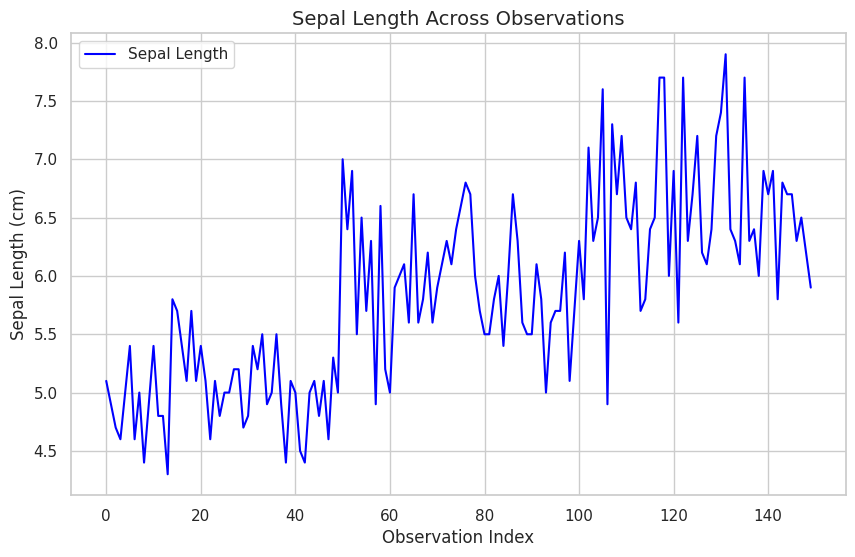

In [12]:
#Task 3: Data Visualization
##Create at least four different types of visualizations:
# Line chart showing trends over time (for example, a time-series of sales data).
# Bar chart showing the comparison of a numerical value across categories (e.g., average petal length per species).
# Histogram of a numerical column to understand its distribution.
# Scatter plot to visualize the relationship between two numerical columns (e.g., sepal length vs. petal length).
# Customize your plots with titles, labels for axes, and legends where necessary.
### lINE CHART
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct URL of the Iris dataset (raw data file)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Column names (since the Iris dataset does not have headers by default)
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset with comma as delimiter and skip bad lines
df = pd.read_csv(url, header=None, names=column_names, sep=',', on_bad_lines='skip')

# Set the style of the plots
sns.set(style="whitegrid")

# 1. Line Chart (Trends over time) - Plotting the sepal length across observations
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sepal_length'], label='Sepal Length', color='blue')
plt.title('Sepal Length Across Observations', fontsize=14)
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel('Sepal Length (cm)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()




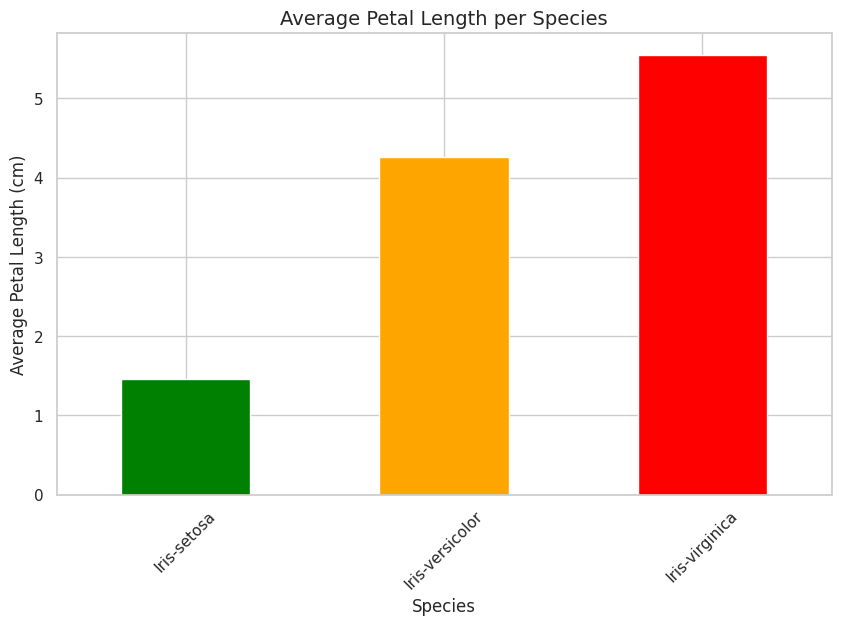

In [13]:

# 2. Bar Chart - Average Petal Length per Species
plt.figure(figsize=(10, 6))
avg_petal_length = df.groupby('species')['petal_length'].mean()
avg_petal_length.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Average Petal Length per Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Average Petal Length (cm)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

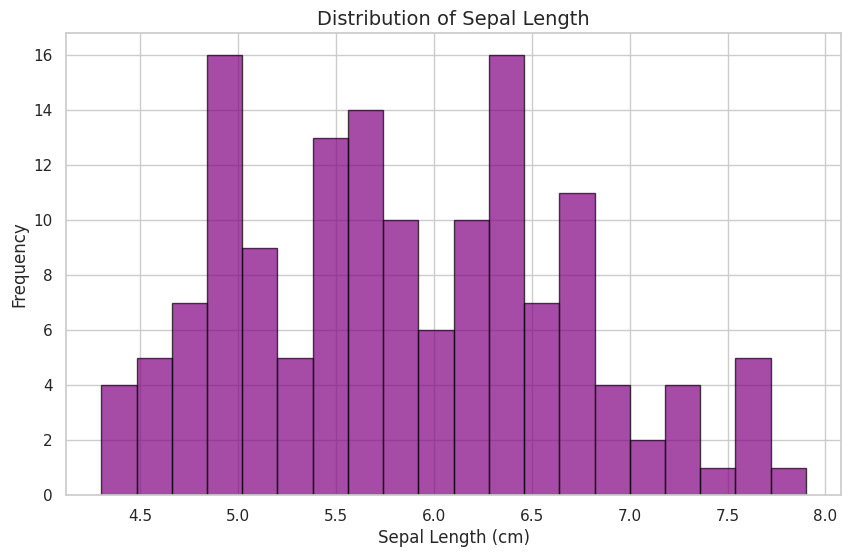

In [14]:
# 3. Histogram - Distribution of Sepal Length
plt.figure(figsize=(10, 6))
plt.hist(df['sepal_length'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sepal Length', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


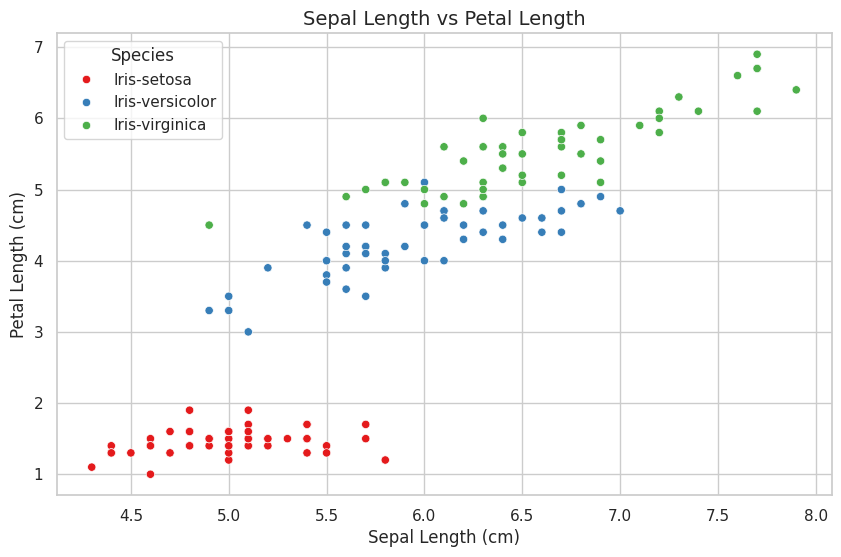

In [15]:
# 4. Scatter Plot - Sepal Length vs Petal Length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='petal_length', data=df, hue='species', palette='Set1')
plt.title('Sepal Length vs Petal Length', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.legend(title='Species')
plt.show()